NBA Analysis
======

In [3]:
from collections import Counter
import joypy
import pandas as pd
import numpy as np
from math import sqrt, log, exp, pi
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import scipy.stats as st
import statsmodels as sm
import seaborn as sns
import warnings



## Load Data

In [4]:
df_stats = pd.read_csv('../Data/Seasons_Stats.csv')
df_players = pd.read_csv('../Data/Players.csv')

In [3]:
df_stats.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [4]:
df_stats.shape

(24691, 53)

## Preprocessing 

In [5]:
df_stats = df_stats[['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'TS%', 'FG', 'FGA', 'FG%', '3P', '3PA', 
        '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 
        'TOV', 'PTS']]

In [6]:
df_stats = df_stats.dropna()

In [7]:
df_stats.Year = df_stats.Year.astype(int)

In [8]:
df_stats['RB'] = df_stats['TRB']
del df_stats['TRB']

In [9]:
df_stats.head()

,Year,Player,Pos,Age,Tm,G,TS%,FG,FGA,FG%,...,eFG%,FT,FTA,FT%,AST,STL,BLK,TOV,PTS,RB
5727,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,0.639,835.0,1383.0,0.604,...,0.604,364.0,476.0,0.765,371.0,81.0,280.0,297.0,2034.0,886.0
5728,1980,Tom Abernethy,PF,25.0,GSW,67.0,0.511,153.0,318.0,0.481,...,0.481,56.0,82.0,0.683,87.0,35.0,12.0,39.0,362.0,191.0
5729,1980,Alvan Adams,C,25.0,PHO,75.0,0.571,465.0,875.0,0.531,...,0.531,188.0,236.0,0.797,322.0,108.0,55.0,218.0,1118.0,609.0
5730,1980,Tiny Archibald*,PG,31.0,BOS,80.0,0.574,383.0,794.0,0.482,...,0.485,361.0,435.0,0.830,671.0,106.0,10.0,242.0,1131.0,197.0
5732,1980,Gus Bailey,SG,28.0,WSB,20.0,0.467,16.0,35.0,0.457,...,0.471,5.0,13.0,0.385,26.0,7.0,4.0,11.0,38.0,28.0


In [10]:
df_stats.shape

(15107, 26)

#### Fan Points

In [11]:
def fan_pts(pts, reb, ast, blk, st, to):
    "Returns a one statistic summary of a players performance"
    return (1*pts + 1.2*reb + 1.5*ast + 3*blk + 3*st - 1*to)

### Calculate Averages, Fan Points, and 3 Point Fraction 

In [12]:
pd.options.display.float_format = '{:,.2f}'.format

In [13]:
df_stats['PTS_avg'] = df_stats['PTS'] / df_stats['G']
df_stats['AST_avg'] = df_stats['AST'] / df_stats['G']
df_stats['STL_avg'] = df_stats['STL'] / df_stats['G']
df_stats['RB_avg'] = df_stats['RB'] / df_stats['G']
df_stats['BLK_avg'] = df_stats['BLK'] / df_stats['G']
df_stats['TOV_avg'] = df_stats['TOV'] / df_stats['G']
df_stats['Fan_PTS'] = fan_pts(df_stats['PTS'], df_stats['RB'], df_stats['AST']
                              , df_stats['BLK'], df_stats['STL'], df_stats['TOV'])
df_stats['Fan_PTS_avg'] = df_stats['Fan_PTS'] / df_stats['G']
df_stats["3Pfract"] = df_stats["3PA"]/df_stats.FGA

### Data Set Summary

In [14]:
print('Number of Seasons in our Data Set: {:.0f}'.format(max(list(df_stats.Year)) - min(list(df_stats.Year))))
print('Number of unique Players in our Data Set: {:.0f}'.format(len(set(list(df_stats.Player)))))
print('Number of Players from 1980 Season: {:.0f}'.format(len(set(list(df_stats[df_stats['Year'] == 1980]['Player'])))))
print('Number of Players from 2017 Season: {:.0f}'.format(len(set(list(df_stats[df_stats['Year'] == 2017]['Player'])))))

Number of Seasons in our Data Set: 37
Number of unique Players in our Data Set: 2416
Number of Players from 1980 Season: 227
Number of Players from 2017 Season: 439


## Find Best Fitting Distribution

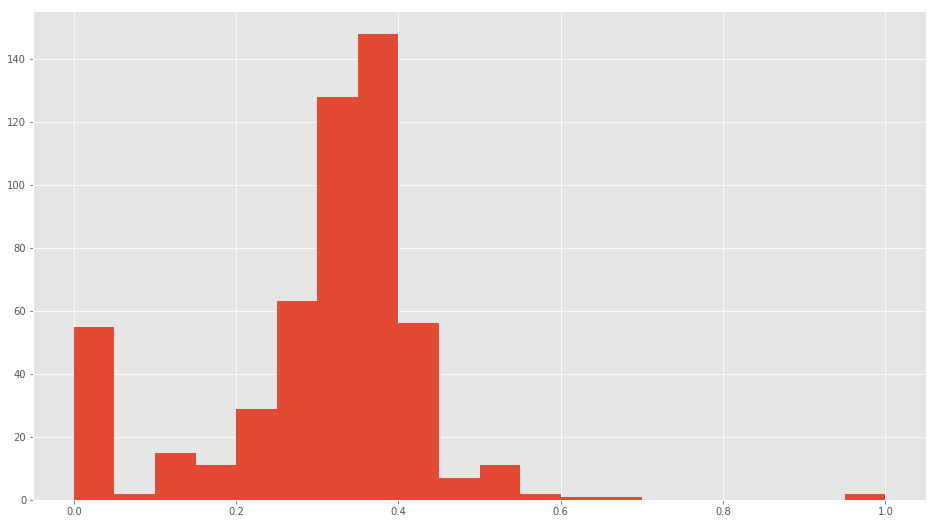

In [34]:
for i in range(2017, 2018):
    df_season = df_stats[df_stats['Year'] == i]
    plt.hist(list(df_season['3P%']), bins=20)
    

/Users/ashvets/anaconda3/envs/special_topics/lib/python3.6/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


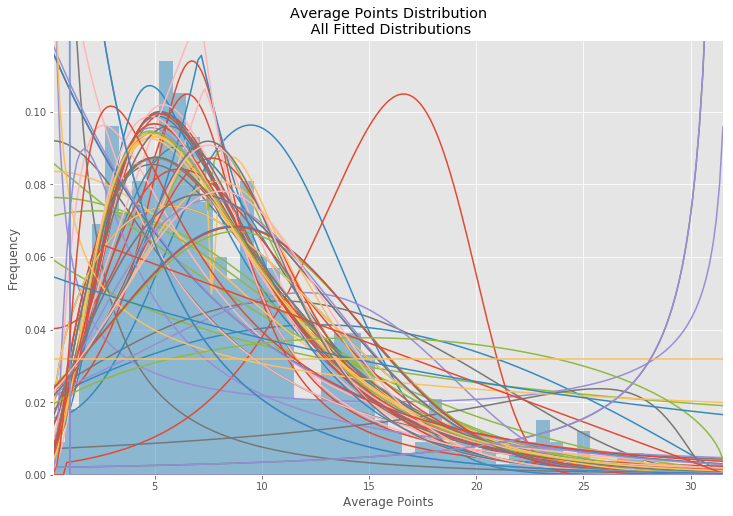

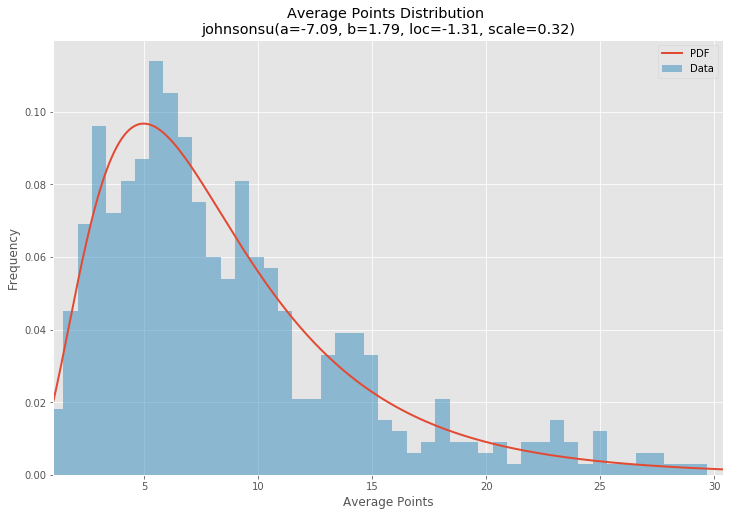

In [35]:
import warnings
import scipy.stats as st
import statsmodels as sm
import matplotlib

#matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = df_season['PTS_avg']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Average Points Distribution\n All Fitted Distributions')
ax.set_xlabel(u'Average Points')
ax.set_ylabel('Frequency')
plt.savefig('plots/all_distributions.png')


# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Average Points Distribution \n' + dist_str)
ax.set_xlabel(u'Average Points')
ax.set_ylabel('Frequency')
plt.savefig('plots/best_distribution.png')

## Tracking Game Progression

In [15]:
threepoints = df_stats[df_stats["FGA"] > 10].sort_values("Year")
threepoints["3Pfract"] = threepoints["3PA"]/threepoints.FGA

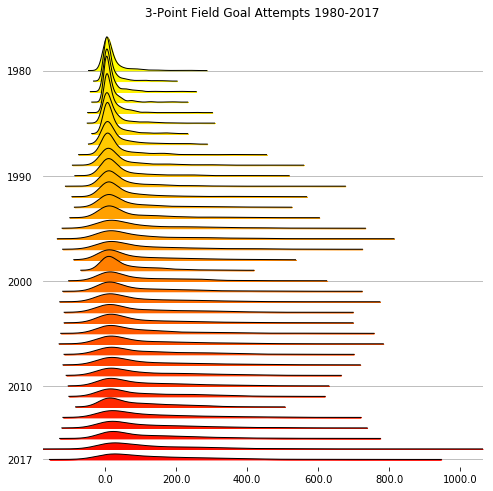

In [16]:
decades = [int(y) if y%10==0 or y == 2017 else None for y in threepoints.Year.unique()]

# Not the best metric since the number of players has also increased! 
fig, axes = joypy.joyplot(df_stats, by="Year", column="3PA", labels=decades, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(7,7),
                          title="3-Point Field Goal Attempts 1980-2017",
                          colormap=cm.autumn_r)

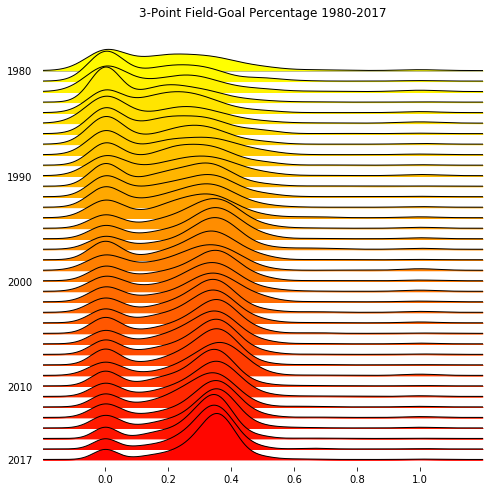

In [17]:
fig, axes = joypy.joyplot(df_stats, by="Year", column="3P%", labels=decades, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(7,7),
                          title="3-Point Field-Goal Percentage 1980-2017",
                          colormap=cm.autumn_r)

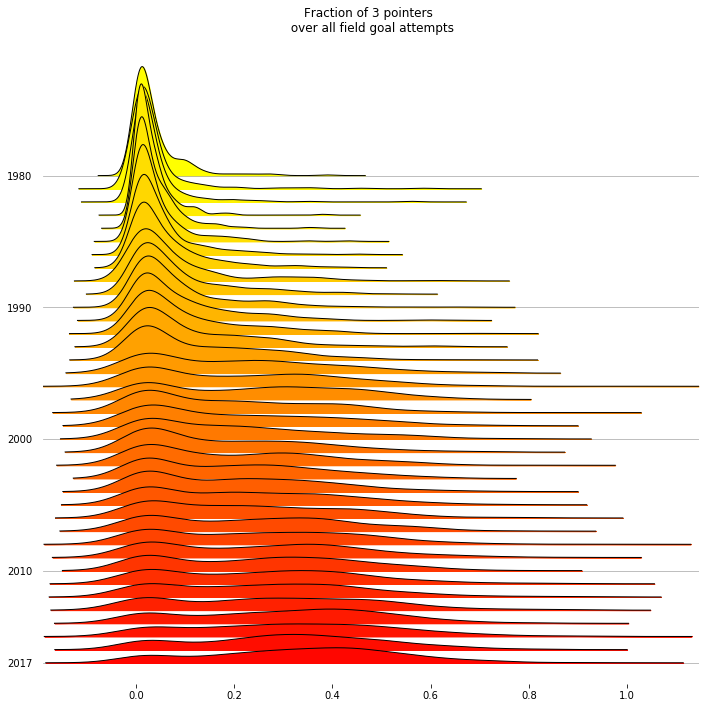

In [22]:
fig, axes = joypy.joyplot(threepoints, by="Year", column="3Pfract",
                  kind="kde", 
                  range_style='own', tails=0.2, 
                  overlap=3, linewidth=1, colormap=cm.autumn_r,
                  labels=decades, grid='y', figsize=(10,10), 
                  title="Fraction of 3 pointers \n over all field goal attempts")
plt.savefig('plots/3ptfraction-joyplot.png')


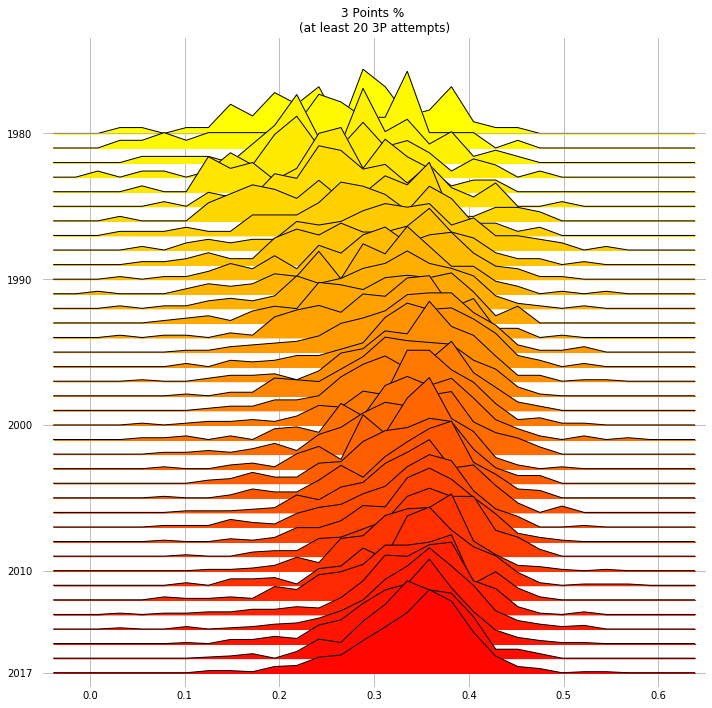

In [23]:
"""With kind=normalized_counts, the values are normalized over the occurrences in each year: 
this is probably needed here, because that the number of teams and players in the NBA has 
grown during the years."""

threepoint_shooters = threepoints[threepoints["3PA"] >= 20] 
decades = [int(y) if y%10==0 or y == 2017 else None for y in threepoint_shooters.Year.unique()]
fig, axes = joypy.joyplot(threepoint_shooters, by="Year", column="3P%",
                   kind="normalized_counts", bins=30, 
                   range_style='all', x_range=[-0.05,0.65],
                   overlap=2, linewidth=1, colormap=cm.autumn_r,
                   labels=decades, grid='both', figsize=(10,10),
                   title="3 Points % \n(at least 20 3P attempts)")
plt.savefig('plots/3pt%-joyplot.png')


### Gaussian-Mixture Model for 3-Point Fraction

In [36]:
data = df_stats[df_stats['Year'] == 2017]['3Pfract']
#data = df_stats[df_stats['Year'] == 2017]['3P%']

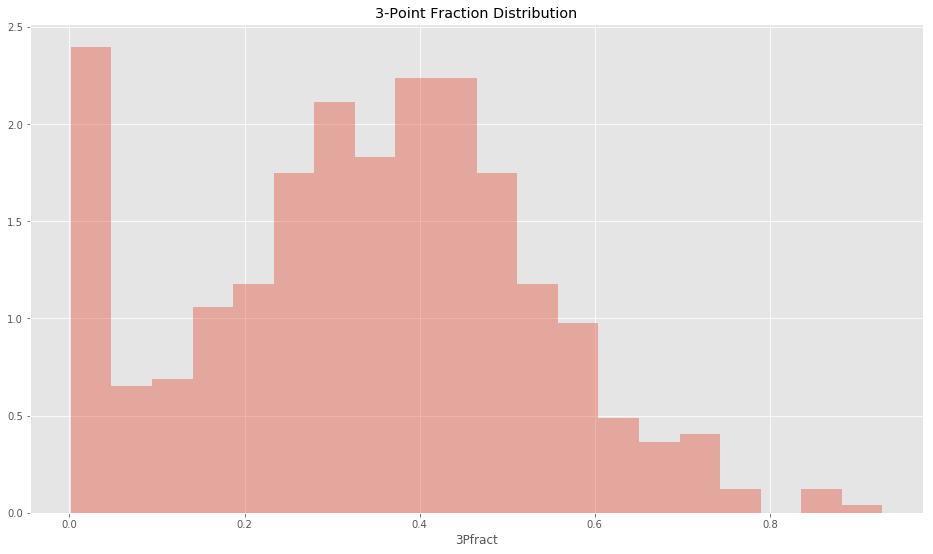

In [44]:
plt.rcParams["figure.figsize"] = [16,9]

sns.distplot(data, bins=20, kde=False, norm_hist=True)
plt.title('3-Point Fraction Distribution');
plt.savefig('plots/3pfractdistribution.png')


In [38]:
class Gaussian:
    "Model univariate Gaussian"

    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y

In [39]:
class GaussianMixture:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, mu_min=0, mu_max=1, sigma_min=.1, sigma_max=1, mix=.5):
        self.data = data
        self.one = Gaussian(mu_min, sigma_min)
        self.two = Gaussian(mu_max, sigma_max)
        self.mix = mix

    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x) # Mixture of two pdfs
    
    def Estep(self):
        "Perform an E(stimation)-step, freshening up self.loglike in the process"
        # Compute weights
        self.loglike = 0 # Keep track of log likelihood to compare models across different restarts
        for datum in self.data:
            # Unnormalized weights
            wp1 = self.one.pdf(datum) * self.mix
            wp2 = self.two.pdf(datum) * (1. - self.mix)

            # Compute denominator
            denominator = wp1 + wp2

            # Normalize
            wp1 /= denominator
            wp2 /= denominator
            
            self.loglike += log(wp1 + wp2) # Add into loglike

            yield (wp1, wp2) # Generator for each data point

    def Mstep(self, weights):
        "Perform an M(aximization)-step"
        # Compute denominators
        left, right = zip(*weights)
        one_denominator = sum(left)
        two_denominator = sum(right)

        # Compute new means
        self.one.mu = sum(w * d / one_denominator for (w, d) in zip(left, data))
        self.two.mu = sum(w * d / two_denominator for (w, d) in zip(right, data))
        
        # Compute new sigmas
        self.one.sigma = sqrt(sum(w * ((d - self.one.mu) ** 2)
                                  for (w, d) in zip(left, data)) / one_denominator)
        self.two.sigma = sqrt(sum(w * ((d - self.two.mu) ** 2)
                                  for (w, d) in zip(right, data)) / two_denominator)
        
        # Compute new mix
        self.mix = one_denominator / len(data)

    def iterate(self, N=1, verbose=False):
        "Perform N iterations, then compute log-likelihood"
        for i in range(1, N+1):
            self.Mstep(self.Estep())
            if verbose:
                print('{0:2} {1}'.format(i, self))
        self.Estep() # to freshen up self.loglike

    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                              self.two, 
                                                              self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, 
                                                        self.mix)

In [40]:
g_single = Gaussian(np.mean(data), np.std(data))
print('Best single Guassian: μ = {:.2}, σ = {:.2}'.format(g_single.mu, g_single.sigma))

Best single Guassian: μ = 0.34, σ = 0.19


In [41]:
n_iterations = 5
best_mix = None
best_loglike = float('-inf')
mix = GaussianMixture(data)
for _ in range(n_iterations):
    try:
        mix.iterate(verbose=True)
        if mix.loglike > best_loglike:
            best_loglike = mix.loglike
            best_mix = mix
    except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
        pass


 1 Mixture: Gaussian(0.115215, 0.0987623), Gaussian(0.422534, 0.142099), mix=0.274)
 1 Mixture: Gaussian(0.111274, 0.100443), Gaussian(0.418959, 0.143367), mix=0.262)
 1 Mixture: Gaussian(0.108208, 0.0996184), Gaussian(0.416212, 0.144901), mix=0.253)
 1 Mixture: Gaussian(0.104836, 0.0980047), Gaussian(0.413851, 0.146142), mix=0.245)
 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)


In [42]:
n_iterations = 20
n_random_restarts = 500
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = GaussianMixture(data)
    for _ in range(n_iterations):
        try:
            mix.iterate(verbose=True)
            if mix.loglike > best_loglike:
                best_loglike = mix.loglike
                best_mix = mix
        except (ZeroDivisionError, ValueError): # Catch division errors from bad starts, and just throw them out...
            pass
print('Done. 🙂')

Computing best model with random restarts...

 1 Mixture: Gaussian(0.115215, 0.0987623), Gaussian(0.422534, 0.142099), mix=0.274)
 1 Mixture: Gaussian(0.111274, 0.100443), Gaussian(0.418959, 0.143367), mix=0.262)
 1 Mixture: Gaussian(0.108208, 0.0996184), Gaussian(0.416212, 0.144901), mix=0.253)
 1 Mixture: Gaussian(0.104836, 0.0980047), Gaussian(0.413851, 0.146142), mix=0.245)
 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)
 1 Mixture: Gaussian(0.0970171, 0.093444), Gaussian(0.409672, 0.148019), mix=0.228)
 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), mix=0.22)
 1 Mixture: Gaussian(0.0879395, 0.0874844), Gaussian(0.40573, 0.149536), mix=0.212)
 1 Mixture: Gaussian(0.0829544, 0.0839938), Gaussian(0.403748, 0.150257), mix=0.204)
 1 Mixture: Gaussian(0.0776684, 0.0801327), Gaussian(0.401727, 0.150983), mix=0.196)
 1 Mixture: Gaussian(0.0720753, 0.075862), Gaussian(0.399653, 0.151731), mix=0.187)
 1 Mixture: Gaussian(0.066172

 1 Mixture: Gaussian(0.0235484, 0.0269724), Gaussian(0.38206, 0.159227), mix=0.122)
 1 Mixture: Gaussian(0.0196525, 0.02212), Gaussian(0.380076, 0.160423), mix=0.116)
 1 Mixture: Gaussian(0.115215, 0.0987623), Gaussian(0.422534, 0.142099), mix=0.274)
 1 Mixture: Gaussian(0.111274, 0.100443), Gaussian(0.418959, 0.143367), mix=0.262)
 1 Mixture: Gaussian(0.108208, 0.0996184), Gaussian(0.416212, 0.144901), mix=0.253)
 1 Mixture: Gaussian(0.104836, 0.0980047), Gaussian(0.413851, 0.146142), mix=0.245)
 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)
 1 Mixture: Gaussian(0.0970171, 0.093444), Gaussian(0.409672, 0.148019), mix=0.228)
 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), mix=0.22)
 1 Mixture: Gaussian(0.0879395, 0.0874844), Gaussian(0.40573, 0.149536), mix=0.212)
 1 Mixture: Gaussian(0.0829544, 0.0839938), Gaussian(0.403748, 0.150257), mix=0.204)
 1 Mixture: Gaussian(0.0776684, 0.0801327), Gaussian(0.401727, 0.150983), mix

 1 Mixture: Gaussian(0.0661724, 0.0711331), Gaussian(0.397517, 0.152511), mix=0.179)
 1 Mixture: Gaussian(0.0599676, 0.0658917), Gaussian(0.395315, 0.153335), mix=0.17)
 1 Mixture: Gaussian(0.0534909, 0.0600822), Gaussian(0.39305, 0.154209), mix=0.161)
 1 Mixture: Gaussian(0.0468171, 0.0536617), Gaussian(0.39074, 0.155135), mix=0.153)
 1 Mixture: Gaussian(0.0401198, 0.0466675), Gaussian(0.388423, 0.156106), mix=0.144)
 1 Mixture: Gaussian(0.0337448, 0.0394096), Gaussian(0.386173, 0.157109), mix=0.136)
 1 Mixture: Gaussian(0.0281505, 0.0326255), Gaussian(0.384058, 0.158138), mix=0.129)
 1 Mixture: Gaussian(0.0235484, 0.0269724), Gaussian(0.38206, 0.159227), mix=0.122)
 1 Mixture: Gaussian(0.0196525, 0.02212), Gaussian(0.380076, 0.160423), mix=0.116)
 1 Mixture: Gaussian(0.115215, 0.0987623), Gaussian(0.422534, 0.142099), mix=0.274)
 1 Mixture: Gaussian(0.111274, 0.100443), Gaussian(0.418959, 0.143367), mix=0.262)
 1 Mixture: Gaussian(0.108208, 0.0996184), Gaussian(0.416212, 0.144901), m

 1 Mixture: Gaussian(0.0235484, 0.0269724), Gaussian(0.38206, 0.159227), mix=0.122)
 1 Mixture: Gaussian(0.0196525, 0.02212), Gaussian(0.380076, 0.160423), mix=0.116)
 1 Mixture: Gaussian(0.115215, 0.0987623), Gaussian(0.422534, 0.142099), mix=0.274)
 1 Mixture: Gaussian(0.111274, 0.100443), Gaussian(0.418959, 0.143367), mix=0.262)
 1 Mixture: Gaussian(0.108208, 0.0996184), Gaussian(0.416212, 0.144901), mix=0.253)
 1 Mixture: Gaussian(0.104836, 0.0980047), Gaussian(0.413851, 0.146142), mix=0.245)
 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)
 1 Mixture: Gaussian(0.0970171, 0.093444), Gaussian(0.409672, 0.148019), mix=0.228)
 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), mix=0.22)
 1 Mixture: Gaussian(0.0879395, 0.0874844), Gaussian(0.40573, 0.149536), mix=0.212)
 1 Mixture: Gaussian(0.0829544, 0.0839938), Gaussian(0.403748, 0.150257), mix=0.204)
 1 Mixture: Gaussian(0.0776684, 0.0801327), Gaussian(0.401727, 0.150983), mix

 1 Mixture: Gaussian(0.0879395, 0.0874844), Gaussian(0.40573, 0.149536), mix=0.212)
 1 Mixture: Gaussian(0.0829544, 0.0839938), Gaussian(0.403748, 0.150257), mix=0.204)
 1 Mixture: Gaussian(0.0776684, 0.0801327), Gaussian(0.401727, 0.150983), mix=0.196)
 1 Mixture: Gaussian(0.0720753, 0.075862), Gaussian(0.399653, 0.151731), mix=0.187)
 1 Mixture: Gaussian(0.0661724, 0.0711331), Gaussian(0.397517, 0.152511), mix=0.179)
 1 Mixture: Gaussian(0.0599676, 0.0658917), Gaussian(0.395315, 0.153335), mix=0.17)
 1 Mixture: Gaussian(0.0534909, 0.0600822), Gaussian(0.39305, 0.154209), mix=0.161)
 1 Mixture: Gaussian(0.0468171, 0.0536617), Gaussian(0.39074, 0.155135), mix=0.153)
 1 Mixture: Gaussian(0.0401198, 0.0466675), Gaussian(0.388423, 0.156106), mix=0.144)
 1 Mixture: Gaussian(0.0337448, 0.0394096), Gaussian(0.386173, 0.157109), mix=0.136)
 1 Mixture: Gaussian(0.0281505, 0.0326255), Gaussian(0.384058, 0.158138), mix=0.129)
 1 Mixture: Gaussian(0.0235484, 0.0269724), Gaussian(0.38206, 0.159227

 1 Mixture: Gaussian(0.0337448, 0.0394096), Gaussian(0.386173, 0.157109), mix=0.136)
 1 Mixture: Gaussian(0.0281505, 0.0326255), Gaussian(0.384058, 0.158138), mix=0.129)
 1 Mixture: Gaussian(0.0235484, 0.0269724), Gaussian(0.38206, 0.159227), mix=0.122)
 1 Mixture: Gaussian(0.0196525, 0.02212), Gaussian(0.380076, 0.160423), mix=0.116)
 1 Mixture: Gaussian(0.115215, 0.0987623), Gaussian(0.422534, 0.142099), mix=0.274)
 1 Mixture: Gaussian(0.111274, 0.100443), Gaussian(0.418959, 0.143367), mix=0.262)
 1 Mixture: Gaussian(0.108208, 0.0996184), Gaussian(0.416212, 0.144901), mix=0.253)
 1 Mixture: Gaussian(0.104836, 0.0980047), Gaussian(0.413851, 0.146142), mix=0.245)
 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)
 1 Mixture: Gaussian(0.0970171, 0.093444), Gaussian(0.409672, 0.148019), mix=0.228)
 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), mix=0.22)
 1 Mixture: Gaussian(0.0879395, 0.0874844), Gaussian(0.40573, 0.149536), mix

 1 Mixture: Gaussian(0.0829544, 0.0839938), Gaussian(0.403748, 0.150257), mix=0.204)
 1 Mixture: Gaussian(0.0776684, 0.0801327), Gaussian(0.401727, 0.150983), mix=0.196)
 1 Mixture: Gaussian(0.0720753, 0.075862), Gaussian(0.399653, 0.151731), mix=0.187)
 1 Mixture: Gaussian(0.0661724, 0.0711331), Gaussian(0.397517, 0.152511), mix=0.179)
 1 Mixture: Gaussian(0.0599676, 0.0658917), Gaussian(0.395315, 0.153335), mix=0.17)
 1 Mixture: Gaussian(0.0534909, 0.0600822), Gaussian(0.39305, 0.154209), mix=0.161)
 1 Mixture: Gaussian(0.0468171, 0.0536617), Gaussian(0.39074, 0.155135), mix=0.153)
 1 Mixture: Gaussian(0.0401198, 0.0466675), Gaussian(0.388423, 0.156106), mix=0.144)
 1 Mixture: Gaussian(0.0337448, 0.0394096), Gaussian(0.386173, 0.157109), mix=0.136)
 1 Mixture: Gaussian(0.0281505, 0.0326255), Gaussian(0.384058, 0.158138), mix=0.129)
 1 Mixture: Gaussian(0.0235484, 0.0269724), Gaussian(0.38206, 0.159227), mix=0.122)
 1 Mixture: Gaussian(0.0196525, 0.02212), Gaussian(0.380076, 0.160423)

 1 Mixture: Gaussian(0.115215, 0.0987623), Gaussian(0.422534, 0.142099), mix=0.274)
 1 Mixture: Gaussian(0.111274, 0.100443), Gaussian(0.418959, 0.143367), mix=0.262)
 1 Mixture: Gaussian(0.108208, 0.0996184), Gaussian(0.416212, 0.144901), mix=0.253)
 1 Mixture: Gaussian(0.104836, 0.0980047), Gaussian(0.413851, 0.146142), mix=0.245)
 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)
 1 Mixture: Gaussian(0.0970171, 0.093444), Gaussian(0.409672, 0.148019), mix=0.228)
 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), mix=0.22)
 1 Mixture: Gaussian(0.0879395, 0.0874844), Gaussian(0.40573, 0.149536), mix=0.212)
 1 Mixture: Gaussian(0.0829544, 0.0839938), Gaussian(0.403748, 0.150257), mix=0.204)
 1 Mixture: Gaussian(0.0776684, 0.0801327), Gaussian(0.401727, 0.150983), mix=0.196)
 1 Mixture: Gaussian(0.0720753, 0.075862), Gaussian(0.399653, 0.151731), mix=0.187)
 1 Mixture: Gaussian(0.0661724, 0.0711331), Gaussian(0.397517, 0.152511), m

 1 Mixture: Gaussian(0.104836, 0.0980047), Gaussian(0.413851, 0.146142), mix=0.245)
 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)
 1 Mixture: Gaussian(0.0970171, 0.093444), Gaussian(0.409672, 0.148019), mix=0.228)
 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), mix=0.22)
 1 Mixture: Gaussian(0.0879395, 0.0874844), Gaussian(0.40573, 0.149536), mix=0.212)
 1 Mixture: Gaussian(0.0829544, 0.0839938), Gaussian(0.403748, 0.150257), mix=0.204)
 1 Mixture: Gaussian(0.0776684, 0.0801327), Gaussian(0.401727, 0.150983), mix=0.196)
 1 Mixture: Gaussian(0.0720753, 0.075862), Gaussian(0.399653, 0.151731), mix=0.187)
 1 Mixture: Gaussian(0.0661724, 0.0711331), Gaussian(0.397517, 0.152511), mix=0.179)
 1 Mixture: Gaussian(0.0599676, 0.0658917), Gaussian(0.395315, 0.153335), mix=0.17)
 1 Mixture: Gaussian(0.0534909, 0.0600822), Gaussian(0.39305, 0.154209), mix=0.161)
 1 Mixture: Gaussian(0.0468171, 0.0536617), Gaussian(0.39074, 0.155135), 

 1 Mixture: Gaussian(0.0337448, 0.0394096), Gaussian(0.386173, 0.157109), mix=0.136)
 1 Mixture: Gaussian(0.0281505, 0.0326255), Gaussian(0.384058, 0.158138), mix=0.129)
 1 Mixture: Gaussian(0.0235484, 0.0269724), Gaussian(0.38206, 0.159227), mix=0.122)
 1 Mixture: Gaussian(0.0196525, 0.02212), Gaussian(0.380076, 0.160423), mix=0.116)
 1 Mixture: Gaussian(0.115215, 0.0987623), Gaussian(0.422534, 0.142099), mix=0.274)
 1 Mixture: Gaussian(0.111274, 0.100443), Gaussian(0.418959, 0.143367), mix=0.262)
 1 Mixture: Gaussian(0.108208, 0.0996184), Gaussian(0.416212, 0.144901), mix=0.253)
 1 Mixture: Gaussian(0.104836, 0.0980047), Gaussian(0.413851, 0.146142), mix=0.245)
 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)
 1 Mixture: Gaussian(0.0970171, 0.093444), Gaussian(0.409672, 0.148019), mix=0.228)
 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), mix=0.22)
 1 Mixture: Gaussian(0.0879395, 0.0874844), Gaussian(0.40573, 0.149536), mix

 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)
 1 Mixture: Gaussian(0.0970171, 0.093444), Gaussian(0.409672, 0.148019), mix=0.228)
 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), mix=0.22)
 1 Mixture: Gaussian(0.0879395, 0.0874844), Gaussian(0.40573, 0.149536), mix=0.212)
 1 Mixture: Gaussian(0.0829544, 0.0839938), Gaussian(0.403748, 0.150257), mix=0.204)
 1 Mixture: Gaussian(0.0776684, 0.0801327), Gaussian(0.401727, 0.150983), mix=0.196)
 1 Mixture: Gaussian(0.0720753, 0.075862), Gaussian(0.399653, 0.151731), mix=0.187)
 1 Mixture: Gaussian(0.0661724, 0.0711331), Gaussian(0.397517, 0.152511), mix=0.179)
 1 Mixture: Gaussian(0.0599676, 0.0658917), Gaussian(0.395315, 0.153335), mix=0.17)
 1 Mixture: Gaussian(0.0534909, 0.0600822), Gaussian(0.39305, 0.154209), mix=0.161)
 1 Mixture: Gaussian(0.0468171, 0.0536617), Gaussian(0.39074, 0.155135), mix=0.153)
 1 Mixture: Gaussian(0.0401198, 0.0466675), Gaussian(0.388423, 0.156106),

 1 Mixture: Gaussian(0.0401198, 0.0466675), Gaussian(0.388423, 0.156106), mix=0.144)
 1 Mixture: Gaussian(0.0337448, 0.0394096), Gaussian(0.386173, 0.157109), mix=0.136)
 1 Mixture: Gaussian(0.0281505, 0.0326255), Gaussian(0.384058, 0.158138), mix=0.129)
 1 Mixture: Gaussian(0.0235484, 0.0269724), Gaussian(0.38206, 0.159227), mix=0.122)
 1 Mixture: Gaussian(0.0196525, 0.02212), Gaussian(0.380076, 0.160423), mix=0.116)
 1 Mixture: Gaussian(0.115215, 0.0987623), Gaussian(0.422534, 0.142099), mix=0.274)
 1 Mixture: Gaussian(0.111274, 0.100443), Gaussian(0.418959, 0.143367), mix=0.262)
 1 Mixture: Gaussian(0.108208, 0.0996184), Gaussian(0.416212, 0.144901), mix=0.253)
 1 Mixture: Gaussian(0.104836, 0.0980047), Gaussian(0.413851, 0.146142), mix=0.245)
 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)
 1 Mixture: Gaussian(0.0970171, 0.093444), Gaussian(0.409672, 0.148019), mix=0.228)
 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), m

 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), mix=0.22)
 1 Mixture: Gaussian(0.0879395, 0.0874844), Gaussian(0.40573, 0.149536), mix=0.212)
 1 Mixture: Gaussian(0.0829544, 0.0839938), Gaussian(0.403748, 0.150257), mix=0.204)
 1 Mixture: Gaussian(0.0776684, 0.0801327), Gaussian(0.401727, 0.150983), mix=0.196)
 1 Mixture: Gaussian(0.0720753, 0.075862), Gaussian(0.399653, 0.151731), mix=0.187)
 1 Mixture: Gaussian(0.0661724, 0.0711331), Gaussian(0.397517, 0.152511), mix=0.179)
 1 Mixture: Gaussian(0.0599676, 0.0658917), Gaussian(0.395315, 0.153335), mix=0.17)
 1 Mixture: Gaussian(0.0534909, 0.0600822), Gaussian(0.39305, 0.154209), mix=0.161)
 1 Mixture: Gaussian(0.0468171, 0.0536617), Gaussian(0.39074, 0.155135), mix=0.153)
 1 Mixture: Gaussian(0.0401198, 0.0466675), Gaussian(0.388423, 0.156106), mix=0.144)
 1 Mixture: Gaussian(0.0337448, 0.0394096), Gaussian(0.386173, 0.157109), mix=0.136)
 1 Mixture: Gaussian(0.0281505, 0.0326255), Gaussian(0.384058, 0.158138

 1 Mixture: Gaussian(0.0401198, 0.0466675), Gaussian(0.388423, 0.156106), mix=0.144)
 1 Mixture: Gaussian(0.0337448, 0.0394096), Gaussian(0.386173, 0.157109), mix=0.136)
 1 Mixture: Gaussian(0.0281505, 0.0326255), Gaussian(0.384058, 0.158138), mix=0.129)
 1 Mixture: Gaussian(0.0235484, 0.0269724), Gaussian(0.38206, 0.159227), mix=0.122)
 1 Mixture: Gaussian(0.0196525, 0.02212), Gaussian(0.380076, 0.160423), mix=0.116)
 1 Mixture: Gaussian(0.115215, 0.0987623), Gaussian(0.422534, 0.142099), mix=0.274)
 1 Mixture: Gaussian(0.111274, 0.100443), Gaussian(0.418959, 0.143367), mix=0.262)
 1 Mixture: Gaussian(0.108208, 0.0996184), Gaussian(0.416212, 0.144901), mix=0.253)
 1 Mixture: Gaussian(0.104836, 0.0980047), Gaussian(0.413851, 0.146142), mix=0.245)
 1 Mixture: Gaussian(0.101095, 0.0959146), Gaussian(0.411703, 0.147153), mix=0.236)
 1 Mixture: Gaussian(0.0970171, 0.093444), Gaussian(0.409672, 0.148019), mix=0.228)
 1 Mixture: Gaussian(0.0926278, 0.0906309), Gaussian(0.407695, 0.148799), m

In [31]:
print('Best Guassian Mixture Model (GMM):')
print(f'1st Guassian: μ = {best_mix.one.mu:.2}, σ = {best_mix.one.sigma:.2}')
print(f'2nd Guassian: μ = {best_mix.two.mu:.2}, σ = { best_mix.two.sigma:.2}')
print(f'Mixture: {best_mix.mix:.2}')

Best Guassian Mixture Model (GMM):
1st Guassian: μ = 0.02, σ = 0.022
2nd Guassian: μ = 0.38, σ = 0.16
Mixture: 0.12


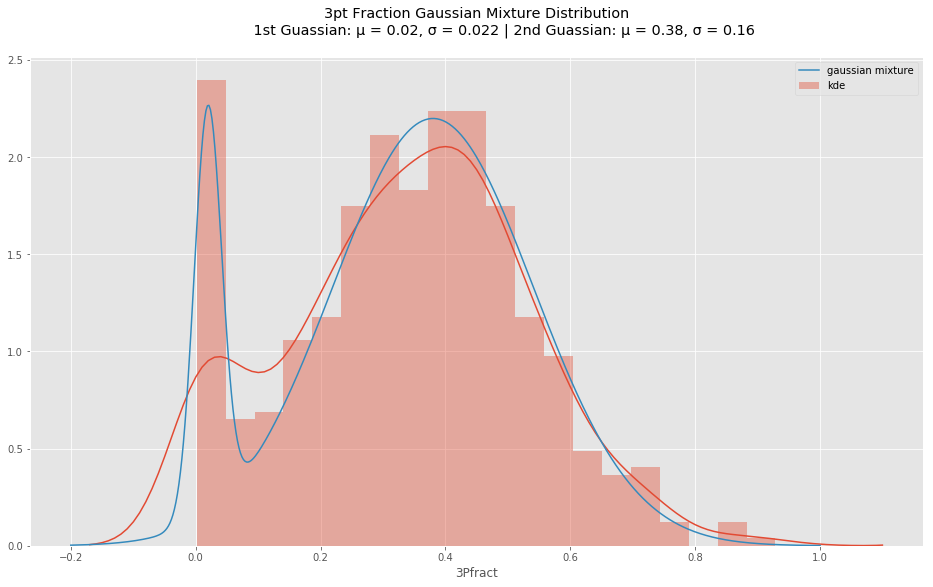

In [58]:
plt.rcParams["figure.figsize"] = [16,9]

sns.distplot(data, bins=20, kde=True, norm_hist=True, label='kde')
x = np.linspace(-.2, 1, 500)
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
plt.legend()
plt.title("""3pt Fraction Gaussian Mixture Distribution
            1st Guassian: μ = {0:.2}, σ = {1:.2} | 2nd Guassian: μ = {2:.2}, σ = {3:.2}
             """.format(best_mix.one.mu, best_mix.one.sigma, best_mix.two.mu, best_mix.two.sigma))
plt.savefig('plots/3ptGaussianMixture.png')

### Find Top Players - Frequentist Approach

In [46]:
statistics = ['RB', 'AST', 'STL', 'BLK', 'PTS']

In [47]:
def remove_duplicate_players(data_frame):
    """Removes duplicate rows of players which played for multiple teams during the season"""
    # Input should be just one season data
    
    player_occurrences = {}
    for i in range(len(data_frame)):
        player_name = data_frame.iloc[i]['Player']
        player_team = data_frame.iloc[i]['Tm']
        index_row = data_frame.index[i]
        if player_name not in player_occurrences:
            player_occurrences[player_name] = []
        player_occurrences[player_name].append((player_team, index_row))

    for key in player_occurrences:
        curr_list = player_occurrences[key]
        if len(curr_list) == 1:
            continue
        for team, index in curr_list:
            if team != "TOT":
                data_frame = data_frame.drop(index)
    return data_frame

In [48]:
def top_players(year, statistic, top_n = 10):
    """Input: season year of interest, statistic of interest, integer representing the number
    of top players returned.
    Output: Table containing top_n players who are the best in the statistic of interest."""
    
    df_season = df_stats[df_stats['Year'] == year]
    df_season = remove_duplicate_players(df_season)
    mean, var, std = st.bayes_mvs(df_season[statistic], alpha=.95)
    top_players = df_season[df_season[statistic] >= mean[0] + 2*std[0]]
    top_players = top_players.sort_values(statistic + '_avg', ascending=False)
    
    return top_players.head(top_n)[['Player', 'G', statistic, statistic + '_avg']]

In [49]:
top_players(2017, 'RB', 10)

,Player,G,RB,RB_avg
24233,Andre Drummond,81.00,"1,116.00",13.78
24389,DeAndre Jordan,81.00,"1,114.00",13.75
24285,Rudy Gobert,81.00,"1,035.00",12.78
24345,Dwight Howard,74.00,940.00,12.70
24625,Karl-Anthony Towns,82.00,"1,007.00",12.28
24218,Anthony Davis,75.00,886.00,11.81
24428,Kevin Love,60.00,666.00,11.10
24206,DeMarcus Cousins,72.00,797.00,11.07
24654,Russell Westbrook,81.00,864.00,10.67
24641,Nikola Vucevic,75.00,779.00,10.39


In [50]:
def first_pick(year):
    
    """Input: Year of draft
       Output: Returns a dataframe of players who appear as top 10 players in more than
       one category (based on the previous years stats."""
    
    df_top = pd.DataFrame(columns=['Player','G','RB', 'RB_avg', 'AST','AST_avg', 
                                   'PTS','PTS_avg','BLK', 'BLK_avg', 'STL', 'STL_avg'])
    
    for i in range(len(statistics)):
        df_top = df_top.append(top_players(year - 1, statistics[i], 10))
        
    counter = Counter(list(df_top.Player))
    
    df_best = pd.DataFrame(columns=['Player','G','RB', 'RB_avg', 'AST','AST_avg', 
                                   'PTS','PTS_avg','BLK', 'BLK_avg', 'STL', 'STL_avg'])
    
    df_test = df_stats[df_stats['Year'] == year - 1]
    df_test = remove_duplicate_players(df_test)
    
    for key, value in counter.items():
        if value > 1:
            df_best = df_best.append(df_test[df_test['Player'] == key])
        else:
            pass  

    return df_best[['Player','G','RB', 'RB_avg', 'AST','AST_avg', 
            'PTS','PTS_avg','BLK', 'BLK_avg', 'STL', 'STL_avg']]

In [51]:
first_pick(2018)

,Player,G,RB,RB_avg,AST,AST_avg,PTS,PTS_avg,BLK,BLK_avg,STL,STL_avg
24389,DeAndre Jordan,81.00,"1,114.00",13.75,96.00,1.19,"1,029.00",12.70,135.00,1.67,52.00,0.64
24285,Rudy Gobert,81.00,"1,035.00",12.78,97.00,1.20,"1,137.00",14.04,214.00,2.64,49.00,0.60
24218,Anthony Davis,75.00,886.00,11.81,157.00,2.09,"2,099.00",27.99,167.00,2.23,94.00,1.25
24206,DeMarcus Cousins,72.00,797.00,11.07,332.00,4.61,"1,942.00",26.97,92.00,1.28,100.00,1.39
24654,Russell Westbrook,81.00,864.00,10.67,840.00,10.37,"2,558.00",31.58,31.00,0.38,133.00,1.64
24306,James Harden,81.00,659.00,8.14,906.00,11.19,"2,356.00",29.09,37.00,0.46,120.00,1.48
24646,John Wall,78.00,326.00,4.18,831.00,10.65,"1,805.00",23.14,49.00,0.63,157.00,2.01
24522,Chris Paul,61.00,304.00,4.98,563.00,9.23,"1,104.00",18.10,8.00,0.13,118.00,1.93
24567,Ricky Rubio,75.00,305.00,4.07,682.00,9.09,836.00,11.15,10.00,0.13,128.00,1.71
24365,LeBron James,74.00,640.00,8.65,646.00,8.73,"1,954.00",26.41,44.00,0.59,92.00,1.24
